In [52]:
import pandas as pd

data = pd.read_csv("../processed_data/data.csv")

# Assuming df is your DataFrame
correlation_matrix = data.corr()

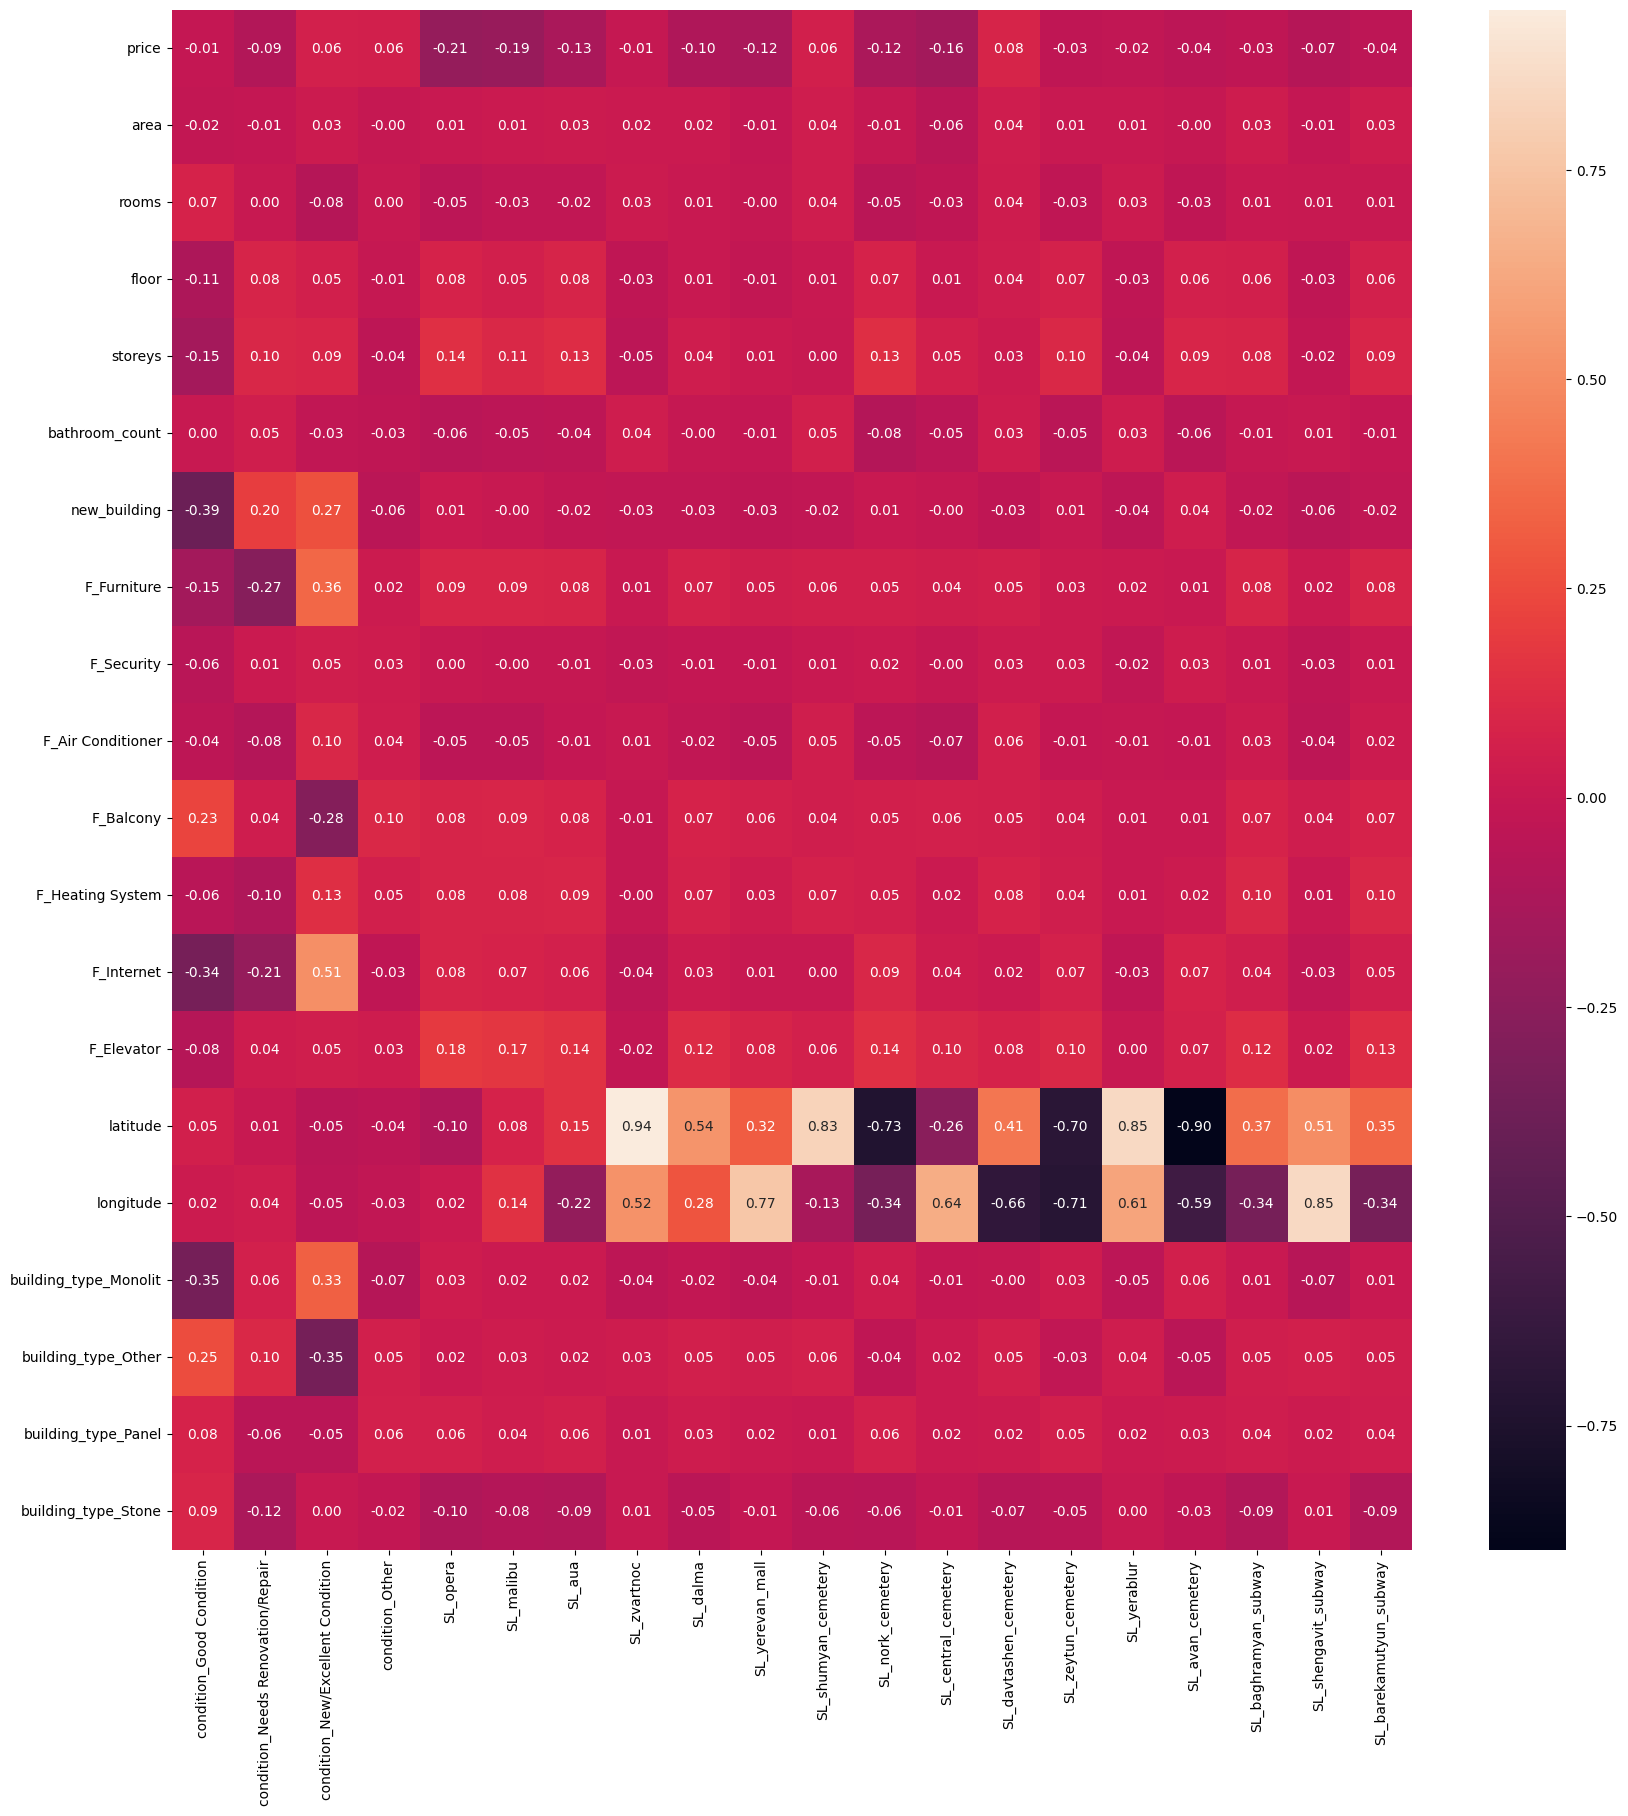

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix.iloc[:20,20:40], annot=True, fmt=".2f")
plt.show()


In [54]:
data = pd.read_csv("../processed_data/data.csv")
data = data.drop(columns = ["SL_barekamutyun_subway", "SL_gergin_subway", 
                     "SL_sasunci_subway", "SL_yeritasardakan_subway", 
                            "SL_avan", "SL_charbakh_subway",
                            "SL_gorcarain_subway", 'latitude', 'longitude',
                            'SL_yerablur', 'SL_malibu', "SL_massiv", 'SL_yerevan_mall',
                            "SL_aua", "SL_avan_cemetery", "SL_nork_cemetery",
                            "SL_zoravar_subway", "SL_davtashen_cemetery",
                            "SL_shumyan_cemetery",
                            
                            "L_bank", "L_payment_terminal"
                           ])

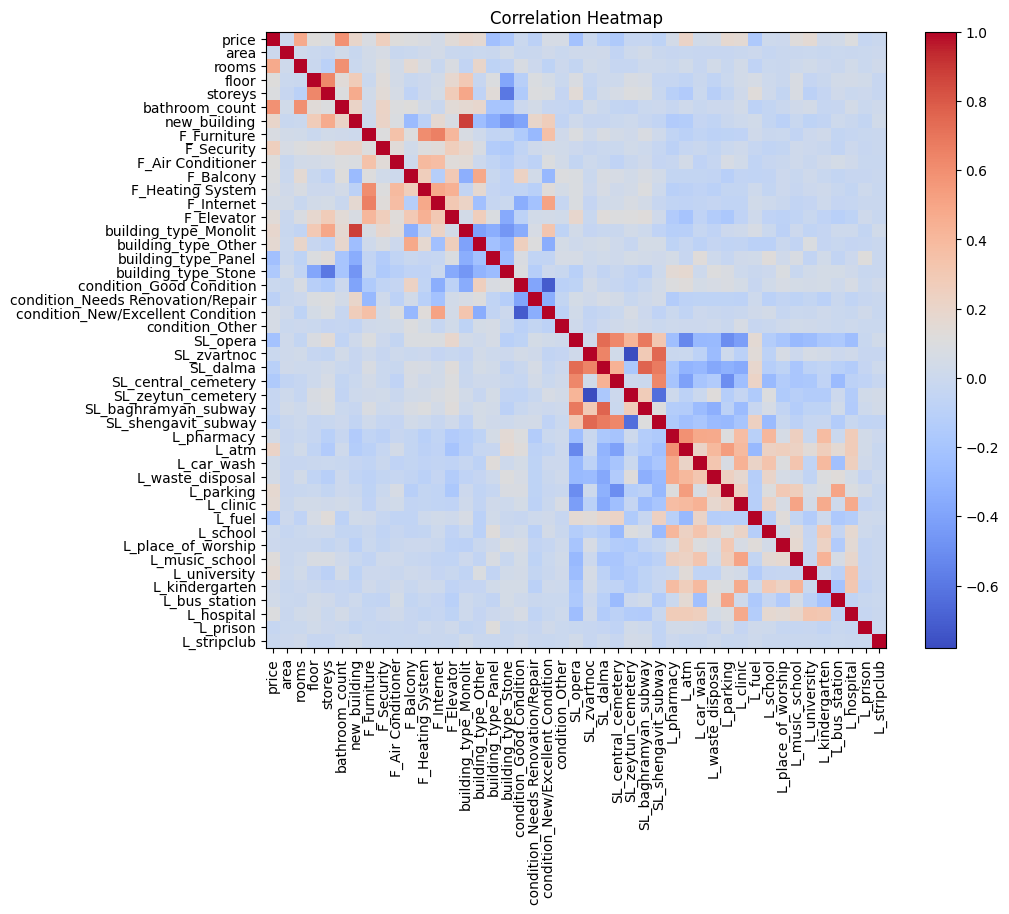

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# Optionally, you can save the correlation matrix to a new DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)


In [56]:
# Flatten the correlation matrix and reset index
correlation_flat = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().reset_index()
correlation_flat.columns = ['Feature1', 'Feature2', 'Correlation']

# Sort by absolute correlation values in descending order
correlation_flat['AbsCorrelation'] = correlation_flat['Correlation'].abs()
sorted_correlations = correlation_flat.sort_values(by='AbsCorrelation', ascending=False)

# Select top 10 correlated pairs
top_10_correlated_pairs = sorted_correlations.head(60)
top_10_correlated_pairs = top_10_correlated_pairs.drop('AbsCorrelation', axis=1)

print(top_10_correlated_pairs)


                     Feature1                           Feature2  Correlation
256              new_building              building_type_Monolit     0.879399
761               SL_zvartnoc                 SL_zeytun_cemetery    -0.779635
782                  SL_dalma               SL_baghramyan_subway     0.761246
763               SL_zvartnoc                SL_shengavit_subway     0.746288
738                  SL_opera                           SL_dalma     0.732201
640  condition_Good Condition  condition_New/Excellent Condition    -0.713350
741                  SL_opera               SL_baghramyan_subway     0.682134
783                  SL_dalma                SL_shengavit_subway     0.675738
291               F_Furniture                         F_Internet     0.654614
759               SL_zvartnoc                           SL_dalma     0.640598
820        SL_zeytun_cemetery                SL_shengavit_subway    -0.637561
802       SL_central_cemetery                SL_shengavit_subway

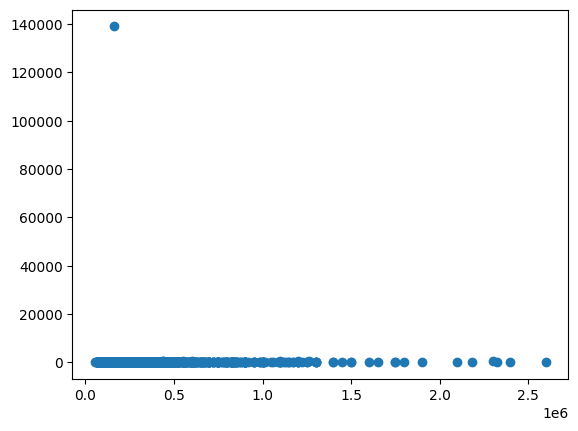

In [57]:
plt.scatter(data["price"], data["area"])

In [58]:
from scipy import stats

# Assuming 'data' is your DataFrame
z_scores = np.abs(stats.zscore(data["price"] / data["area"]))
outliers_z = np.where(z_scores > 4)

# Print outlier data points
print(data.iloc[outliers_z])
outlier = [
    "myrealty   142500",
    "bnakaran  d116260" #divide by 400
]


        source       id      price   area  rooms  floor  storeys  \
142       bars   1-S-72  1500000.0  170.0    3.0   10.0      5.0   
146       bars   1-S-73  2400000.0  200.0    4.0    9.0      4.0   
530   myrealty   142696  1900000.0  200.0    4.0    5.0     10.0   
588   myrealty   142500  2181820.0   86.0    3.0    4.0      6.0   
1591  bnakaran  d116260   575000.0   66.0    2.0    5.0     10.0   
1711  bnakaran   d94169  1300000.0  150.0    4.0    6.0     10.0   
2018  bnakaran  d103147  2600000.0  280.0    3.0    8.0     10.0   

      bathroom_count  new_building  F_Furniture  ...  L_fuel  L_school  \
142              3.0             0            1  ...       0         1   
146              2.0             0            1  ...       0         1   
530              2.0             1            0  ...       0         3   
588              1.0             1            1  ...       0         0   
1591             1.0             1            0  ...       2         0   
1711       

In [59]:
index = data[(data.source == "bnakaran") & (data.id == "d116260")].index
data.loc[index, 'price'] /= 400

data = data.drop(data[data.id == "142500"].index)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2021
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   source                             2021 non-null   object 
 1   id                                 2021 non-null   object 
 2   price                              2021 non-null   float64
 3   area                               2021 non-null   float64
 4   rooms                              2021 non-null   float64
 5   floor                              2021 non-null   float64
 6   storeys                            2021 non-null   float64
 7   bathroom_count                     2021 non-null   float64
 8   new_building                       2021 non-null   int64  
 9   F_Furniture                        2021 non-null   int64  
 10  F_Security                         2021 non-null   int64  
 11  F_Air Conditioner                  2021 non-null   int64

In [69]:
data = data.drop(data[data["area"] > 100000].index)

In [71]:
data.to_csv("../processed_data/data.csv", index=False)

In [70]:
data

,source,id,price,area,rooms,floor,storeys,bathroom_count,new_building,F_Furniture,...,L_fuel,L_school,L_place_of_worship,L_music_school,L_university,L_kindergarten,L_bus_station,L_hospital,L_prison,L_stripclub
0,bars,4-3-1430,130000.0,60.5,2.0,3.0,13.0,1.0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,bars,4-3-1430.1,215000.0,96.1,3.0,4.0,13.0,2.0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,bars,1-N-432,560000.0,156.4,4.0,9.0,17.0,2.0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,bars,1-N-429,410000.0,75.0,3.0,3.0,12.0,2.0,0,0,...,1,2,1,1,1,1,0,0,0,0
4,bars,1-A-118,420000.0,138.0,4.0,3.0,5.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,bnakaran,d117204,315000.0,152.0,5.0,8.0,9.0,2.0,1,0,...,0,0,0,0,0,0,0,2,0,0
2018,bnakaran,d103147,2600000.0,280.0,3.0,8.0,10.0,2.0,1,0,...,0,3,0,0,1,1,0,0,0,0
2019,bnakaran,d117922,150000.0,78.0,2.0,4.0,10.0,1.0,0,0,...,0,1,0,0,0,0,0,3,0,0
2020,bnakaran,d93008,260000.0,90.0,3.0,3.0,5.0,2.0,0,0,...,0,0,0,0,3,0,0,0,0,0
